Single neuron perceptron

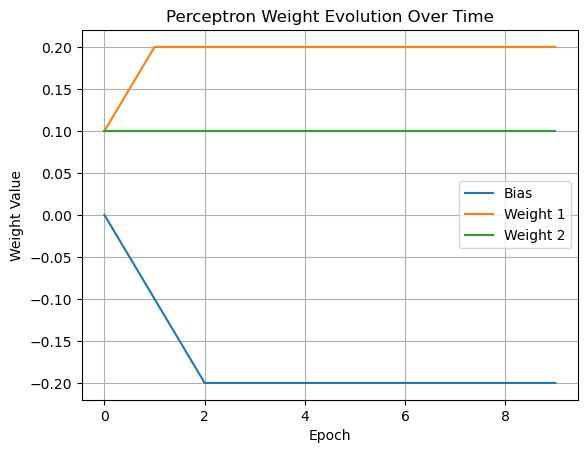

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight_history = []  # To track weights over time

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return self.activation(z)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (target - prediction)
                self.weights[1:] += update * xi
                self.weights[0] += update  # bias update
            self.weight_history.append(self.weights.copy())  # Save current weights

    def plot_weight_history(self):
        weight_array = np.array(self.weight_history)
        for i in range(weight_array.shape[1]):
            plt.plot(weight_array[:, i], label=f'Weight {i}' if i > 0 else 'Bias')
        plt.xlabel('Epoch')
        plt.ylabel('Weight Value')
        plt.title('Perceptron Weight Evolution Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1])  # AND gate output

    p = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
    p.train(X, y)
    p.plot_weight_history()


Multi-layer perceptron

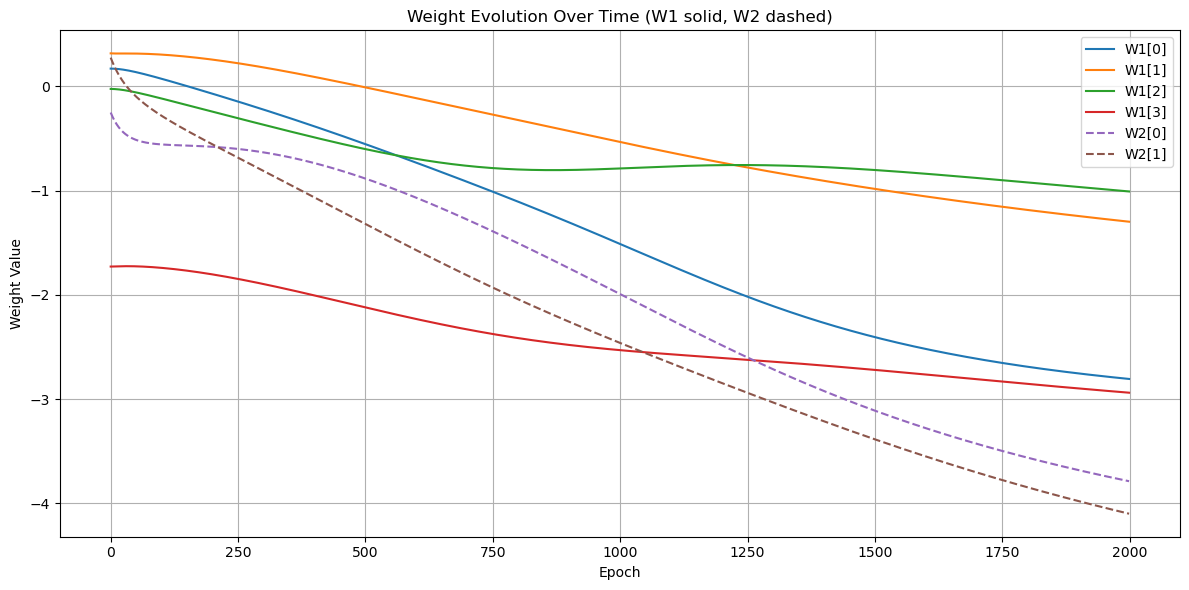

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.lr = learning_rate
        self.epochs = epochs

        # Weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # To store weight history
        self.W1_history = []
        self.W2_history = []

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Update weights
        self.W2 += self.a1.T.dot(d_output) * self.lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(d_hidden) * self.lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y):
        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Store flattened weights per epoch
            self.W1_history.append(self.W1.flatten().copy())
            self.W2_history.append(self.W2.flatten().copy())

            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)
                # print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

    def plot_weight_evolution(self):
        W1_array = np.array(self.W1_history)
        W2_array = np.array(self.W2_history)

        plt.figure(figsize=(12, 6))

        # Plot W1
        for i in range(W1_array.shape[1]):
            plt.plot(W1_array[:, i], label=f'W1[{i}]')

        # Plot W2
        for j in range(W2_array.shape[1]):
            plt.plot(W2_array[:, j], linestyle='--', label=f'W2[{j}]')

        plt.xlabel('Epoch')
        plt.ylabel('Weight Value')
        plt.title('Weight Evolution Over Time (W1 solid, W2 dashed)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Run it on the AND gate
if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [0], [0], [1]])  # AND gate

    mlp = MLP(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=2000)
    mlp.train(X, y)
    mlp.plot_weight_evolution()


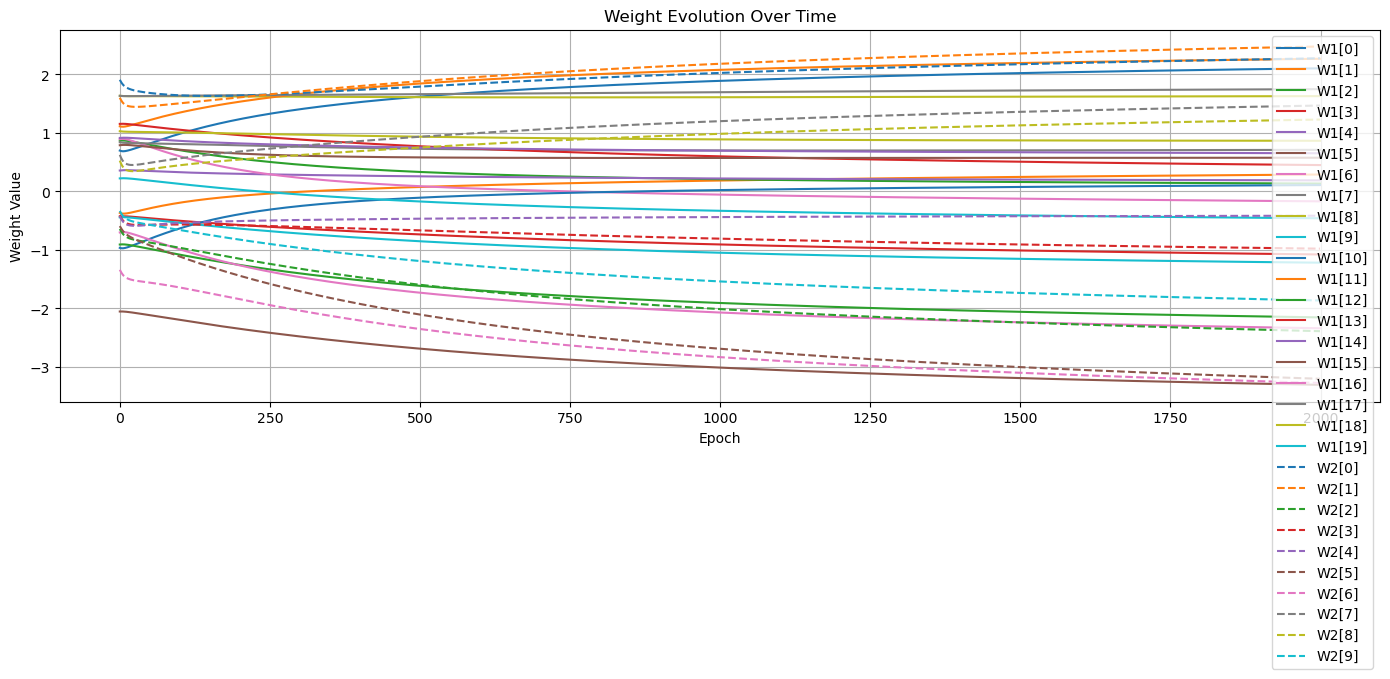

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        assert 1 <= hidden_size <= 10, "Hidden layer size must be between 1 and 10."

        self.lr = learning_rate
        self.epochs = epochs

        # Weight initialization
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # History tracking
        self.W1_history = []
        self.W2_history = []

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)

        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Gradient descent update
        self.W2 += self.a1.T.dot(d_output) * self.lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(d_hidden) * self.lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y):
        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Save flattened weights per epoch
            self.W1_history.append(self.W1.flatten().copy())
            self.W2_history.append(self.W2.flatten().copy())

            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

    def plot_weight_evolution(self):
        W1_array = np.array(self.W1_history)
        W2_array = np.array(self.W2_history)

        plt.figure(figsize=(14, 6))

        # W1: input to hidden
        for i in range(W1_array.shape[1]):
            plt.plot(W1_array[:, i], label=f'W1[{i}]')

        # W2: hidden to output
        for j in range(W2_array.shape[1]):
            plt.plot(W2_array[:, j], linestyle='--', label=f'W2[{j}]')

        plt.title("Weight Evolution Over Time")
        plt.xlabel("Epoch")
        plt.ylabel("Weight Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # AND gate
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [0], [0], [1]])

    # Try 3 neurons, increase to up to 10
    hidden_neurons = 10  # You can change this to 4, 5, ..., 10
    mlp = MLP(input_size=2, hidden_size=hidden_neurons, output_size=1, learning_rate=0.1, epochs=2000)
    mlp.train(X, y)
    mlp.plot_weight_evolution()

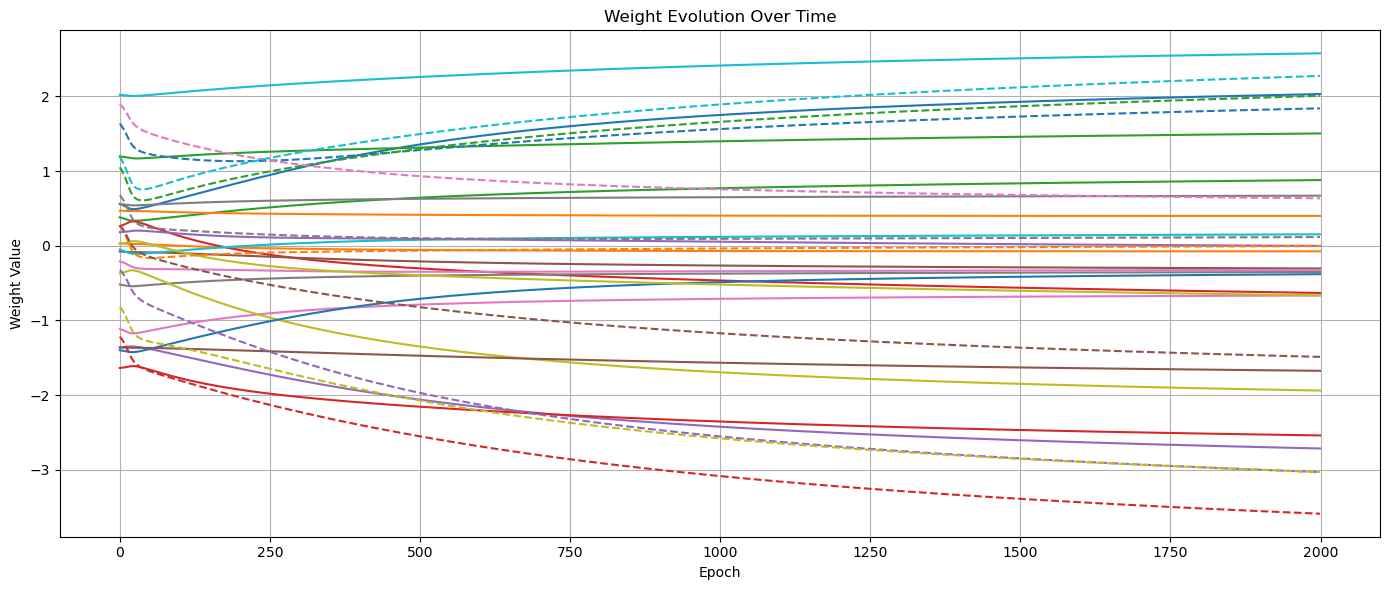

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

def export_weight_history_as_dataframe(self):
    W1_array = np.array(self.W1_history)
    W2_array = np.array(self.W2_history)
    num_epochs = W1_array.shape[0]

    # Create column names
    W1_columns = [f'W1[{i}]' for i in range(W1_array.shape[1])]
    W2_columns = [f'W2[{i}]' for i in range(W2_array.shape[1])]

    # Combine all weights into a DataFrame
    all_weights = np.hstack((W1_array, W2_array))
    all_columns = W1_columns + W2_columns
    df = pd.DataFrame(all_weights, columns=all_columns)

    # Add epoch index
    df.insert(0, 'epoch', np.arange(num_epochs))

    return df


class MLP:
    # Paste this inside the MLP class
    def export_weight_history_as_dataframe(self):
        W1_array = np.array(self.W1_history)
        W2_array = np.array(self.W2_history)
        num_epochs = W1_array.shape[0]

        # Create column names
        W1_columns = [f'W1[{i}]' for i in range(W1_array.shape[1])]
        W2_columns = [f'W2[{i}]' for i in range(W2_array.shape[1])]

        # Combine weights
        all_weights = np.hstack((W1_array, W2_array))
        all_columns = W1_columns + W2_columns
        df = pd.DataFrame(all_weights, columns=all_columns)

        # Add epoch number as the first column
        df.insert(0, 'epoch', np.arange(num_epochs))

        return df

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        assert 1 <= hidden_size <= 10, "Hidden layer size must be between 1 and 10."

        self.lr = learning_rate
        self.epochs = epochs

        # Weight initialization
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))


        # History tracking
        self.W1_history = []
        self.W2_history = []

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)

        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Gradient descent update
        self.W2 += self.a1.T.dot(d_output) * self.lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(d_hidden) * self.lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y):
        for epoch in range(self.epochs):
            output = self.forward(X)
            self.backward(X, y, output)

            # Save flattened weights per epoch
            self.W1_history.append(self.W1.flatten().copy())
            self.W2_history.append(self.W2.flatten().copy())

            if epoch % 100 == 0:
                loss = np.mean((y - output) ** 2)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

    def plot_weight_evolution(self):
        W1_array = np.array(self.W1_history)
        W2_array = np.array(self.W2_history)

        plt.figure(figsize=(14, 6))

        # W1: input to hidden
        for i in range(W1_array.shape[1]):
            plt.plot(W1_array[:, i], label=f'W1[{i}]')

        # W2: hidden to output
        for j in range(W2_array.shape[1]):
            plt.plot(W2_array[:, j], linestyle='--', label=f'W2[{j}]')

        plt.title("Weight Evolution Over Time")
        plt.xlabel("Epoch")
        plt.ylabel("Weight Value")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # AND gate
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [0], [0], [1]])

    # Try 3 neurons, increase to up to 10
    hidden_neurons = 10  # You can change this to 4, 5, ..., 10
    mlp = MLP(input_size=2, hidden_size=hidden_neurons, output_size=1, learning_rate=0.1, epochs=2000)
    mlp.train(X, y)
    mlp.plot_weight_evolution()
    df_weights = mlp.export_weight_history_as_dataframe()
    df_weights.to_csv("Data\\Perceptron\\weight_evolution.csv", index=False)  # Optional: export to CSV

Compute information metrics

In [17]:
import infotopo_no_prints
import os
import xgi
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from sklearn.utils import Bunch
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [31]:
# Normalize the first two columns individually for a given dataframe (range 0-1)
def normalize_columns(df):
    # Normalize first column (index 0)
    min_x, max_x = df.iloc[:, 0].min(), df.iloc[:, 0].max()
    df.iloc[:, 0] = (df.iloc[:, 0] - min_x) / (max_x - min_x) if max_x != min_x else 0
    
    # Normalize second column (index 1)
    min_y, max_y = df.iloc[:, 1].min(), df.iloc[:, 1].max()
    df.iloc[:, 1] = (df.iloc[:, 1] - min_y) / (max_y - min_y) if max_y != min_y else 0
    
    return df

# Optimized function to compute TSE complexity
def compute_tse_complexity(TC_dict):
    """
    Computes the TSE complexity given a dictionary of total correlations.
    
    Parameters:
        TC_dict (dict): Dictionary of total correlations where keys are tuples (subsets).
        
    Returns:
        float: The TSE complexity.
    """
    N = max(len(subset) for subset in TC_dict)  # Maximum subset size
    TSE = 0
    for gamma in range(1, N):
        TC_full = (gamma / N) * TC_dict[tuple(range(1, N + 1))]
        E_TC_gamma = np.mean([TC_dict[subset] for subset in TC_dict if len(subset) == gamma])
        TSE += TC_full - E_TC_gamma
    return TSE

# Convert pandas dataframe to bunch object
def dataframe_to_bunch(dataframe, target=None, feature_names=None, target_names=None, descr="Custom dataset"):
    if feature_names is None:
        feature_names = dataframe.columns.tolist()
    
    return Bunch(
        data=dataframe.to_numpy(),
        target=target if target is not None else np.zeros(dataframe.shape[0]),
        feature_names=feature_names,
        target_names=target_names if target_names is not None else ["target"],
        DESCR=descr
    )

# Obtain topological information metrics using infotopo
def obtain_infotopo_metrics(dataset, dimension_max=0, dimension_tot=0):

    if dimension_max == 0:
        dimension_max = 3 #dataset.shape[1]
    if dimension_tot == 0:
        dimension_tot = 9 #dataset.shape[1]
    
    sample_size = dataset.shape[0]
    nb_of_values = 16
    forward_computation_mode = True
    work_on_transpose = False
    supervised_mode = False
    sampling_mode = 1
    deformed_probability_mode = False

    information_topo = infotopo_no_prints.infotopo(dimension_max = dimension_max,
                                dimension_tot = dimension_tot,
                                sample_size = sample_size,
                                work_on_transpose = work_on_transpose,
                                nb_of_values = nb_of_values,
                                sampling_mode = sampling_mode,
                                deformed_probability_mode = deformed_probability_mode,
                                supervised_mode = supervised_mode,
                                forward_computation_mode = forward_computation_mode)
    
    Nentropie = information_topo.simplicial_entropies_decomposition(dataset)
    Ninfomut = information_topo.simplicial_infomut_decomposition(Nentropie)
    Nfree_energy = information_topo.total_correlation_simplicial_lanscape(Nentropie)
    
    return  Nentropie, Ninfomut, Nfree_energy

# Function to compute metrics for a time window sliding over a given timeseries
def interactions_values_relative(df_input, window_size=0, window_step=0, dimension_max=0, dimension_tot=0):
    # Initialize an empty DataFrame
    columns = ['R_sum', 'S_sum', 'TSE_value', 'R_std', 'S_std']
    df_output = pd.DataFrame(columns=columns)

    # Set initial window conditions
    if window_size == 0:
        window_size = len(df_input)-1
    if window_step == 0:
        window_step = 1
    window_start = 0
    window_end = window_start + window_size

    while window_end < len(df_input):
        bunch_data = dataframe_to_bunch(df_input.iloc[window_start:window_end])
        Nentropie, Ninfomut, Nfree_energy = obtain_infotopo_metrics(bunch_data.data, dimension_max, dimension_tot)

        S_values = [(TC - MI) / 2 for TC, MI in zip(Nfree_energy.values(), Ninfomut.values())]
        R_values = [(TC + MI) / 2 for TC, MI in zip(Nfree_energy.values(), Ninfomut.values())]
        S_std = np.std(S_values, ddof=1)
        R_std = np.std(R_values, ddof=1)
        S_sum = sum(S_values)
        R_sum = sum(R_values)
        TSE_value = compute_tse_complexity(Nfree_energy)

        # Add the new values to the dataframe
        new_row = pd.DataFrame({'R_sum': [R_sum], 'S_sum': [S_sum], 'TSE_value': [TSE_value], 'R_std': [R_std], 'S_std':[S_std]})
        df_output = pd.concat([df_output, new_row], ignore_index=True)
        
        window_start += window_step
        window_end += window_step

    # Normalize all the values so that the S and R values are all positive and the maximum R and S are 1 and minimum 0.
    min_R = df_output.iloc[:, 0].min()
    df_output.iloc[:, 0] += abs(min_R)

    df_output['S_sum'] = (df_output['S_sum'] - df_output['S_sum'].min()) / (df_output['S_sum'].max() - df_output['S_sum'].min())
    df_output['R_sum'] = (df_output['R_sum'] - df_output['R_sum'].min()) / (df_output['R_sum'].max() - df_output['R_sum'].min())

    return df_output

# Normalize any given list between 0-1
def normalize_list(values):
    min_val = min(values)
    max_val = max(values)
    return [(val - min_val) / (max_val - min_val) if max_val != min_val else 0 for val in values]

In [34]:
# Obtain information metrics
window_size = 1000
window_step = 10
dimension_max = 10
dimension_tot = 10
df_subset = df_weights.iloc[:, 1:]

df_oscillators = interactions_values_relative(df_subset, window_size, window_step, dimension_max, dimension_tot)

C:\Users\cyril\AppData\Local\Temp\ipykernel_13740\1473971149.py:105: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output = pd.concat([df_output, new_row], ignore_index=True)


C:\Users\cyril\AppData\Local\Temp\ipykernel_13740\554030817.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


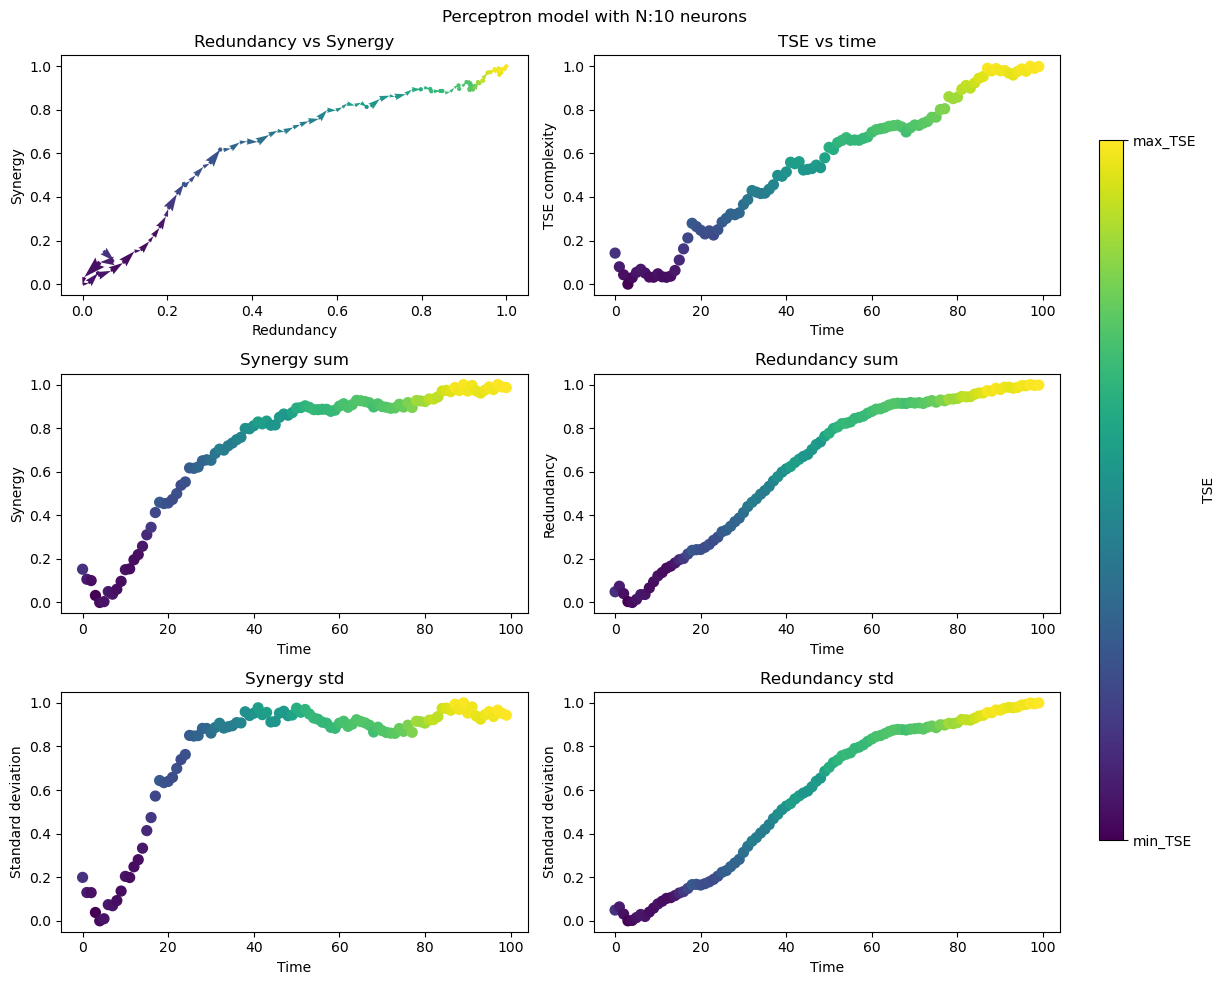

In [35]:
# Create a 2x2 figure for subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Compute the average of the simulations
df = df_oscillators

# Extract data
x1, y1, c1 = df['S_std'], df.index, df['TSE_value']
x2, y2, c2 = df['R_std'], df.index, df['TSE_value']
x3, y3, c3 = df['R_sum'], df['S_sum'], df['TSE_value']
x4, y4, c4 = df['S_sum'], df.index, df['TSE_value']
x5, y5, c5 = df['R_sum'], df.index, df['TSE_value']

# Compute arrow directions (differences between consecutive points)
dx3, dy3 = np.diff(x3), np.diff(y3)

# Normalize colors based on TSE_value
norm = mcolors.Normalize(vmin=df['TSE_value'].min(), vmax=df['TSE_value'].max())
cmap = plt.cm.viridis

# First subplot (Redundancy vs Synergy path)
ax1 = axes[0, 0]
q3 = ax1.quiver(x3[:-1], normalize_list(y3[:-1]), dx3, dy3, c3[:-1], cmap=cmap, norm=norm, angles='xy', scale_units='xy', scale=1, width=0.01, alpha=1)
ax1.set_xlabel('Redundancy')
ax1.set_ylabel('Synergy')
ax1.set_title('Redundancy vs Synergy')

# Second subplot (TSE vs time)
ax2 = axes[0, 1]
ax2.scatter(df.index, normalize_list(c3), c=c3, cmap=cmap, norm=norm, s=50)
ax2.set_xlabel('Time')
ax2.set_ylabel('TSE complexity')
ax2.set_title('TSE vs time')

# Third subplot (Synergy std vs time)
ax3 = axes[1, 0]
ax3.scatter(y4, normalize_list(x4), c=c4, cmap=cmap, norm=norm, s=50)
ax3.set_xlabel('Time')
ax3.set_ylabel('Synergy')
ax3.set_title('Synergy sum')

# Fourth subplot (Redundancy std vs time)
ax4 = axes[1, 1]
ax4.scatter(y5, x5, c=c5, cmap=cmap, norm=norm, s=50)
ax4.set_xlabel('Time')
ax4.set_ylabel('Redundancy')
ax4.set_title('Redundancy sum')

# Third subplot (Synergy std vs time)
ax3 = axes[2, 0]
ax3.scatter(y1, normalize_list(x1), c=c1, cmap=cmap, norm=norm, s=50)
ax3.set_xlabel('Time')
ax3.set_ylabel('Standard deviation')
ax3.set_title('Synergy std')

# Fourth subplot (Redundancy std vs time)
ax4 = axes[2, 1]
ax4.scatter(y2, normalize_list(x2), c=c2, cmap=cmap, norm=norm, s=50)
ax4.set_xlabel('Time')
ax4.set_ylabel('Standard deviation')
ax4.set_title('Redundancy std')

# Add a single colorbar for all subplots, placed beside the right column
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar.set_label('TSE')

# Modify the colorbar labels to 'min_TSE' and 'max_TSE'
min_TSE = c3.min()
max_TSE = c3.max()
cbar.set_ticks([min_TSE, max_TSE])
cbar.set_ticklabels(['min_TSE', 'max_TSE'])

# Adjust layout to avoid overlap
plt.suptitle(f'Perceptron model with N:{hidden_neurons} neurons')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()